# SoupX ambient RNA removal

In [1]:
#install.packages('SoupX')
#Already install

In [3]:
library("SoupX")
library("Seurat")

In [2]:
print(sessionInfo())

R version 4.0.4 (2021-02-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] SeuratObject_4.0.0 Seurat_4.0.1       SoupX_1.5.0       

loaded via a namespace (and not attached):
  [1] nlme_3.1-152          spatstat.sparse_2.0-0 matrixStats_0.58.0   
  [4] RcppAnnoy_0.0.18      RColorBrewer_1.1-2    httr_1.4.2           
  [7] repr_1.1.3   

In [3]:
filtered.files = list.files(path = "/nfs/team205/rb29/mice_gutTCRtg_project/data/tic-1097/", full.names = F)
filtered.files
#/nfs/team205/rb29/mice_gutTCRtg_project/data/tic-1097/crout1/outs/per_sample_outs/crout1/count/
raw.files= list.files(path = "/nfs/team205/rb29/mice_gutTCRtg_project/data/tic-1097/crout1/outs/multi/count", full.names = F)
raw.files

[1] "actions" "crout1"  "crout2"  "crout3"  "crout4"  "data"    "logs"   
[8] "tmp"

[1] "raw_cloupe.cloupe"             "raw_feature_bc_matrix"        
[3] "raw_feature_bc_matrix.h5"      "raw_molecule_info.h5"         
[5] "unassigned_alignments.bam"     "unassigned_alignments.bam.bai"

In [4]:
list = list("crout1","crout2",'crout3','crout4')
list

[[1]]
[1] "crout1"

[[2]]
[1] "crout2"

[[3]]
[1] "crout3"

[[4]]
[1] "crout4"

Centering and scaling data matrix

PC_ 1 
Positive:  Hmgb2, Hmgn2, Ube2s, Birc5, Cks1b, Selenoh, Tubb4b, Top2a, Lmnb1, Pclaf 
	   Spc24, Bub3, Cdk1, Cdca3, Stmn1, Cdca8, Snrpd1, Ccna2, Cks2, Mki67 
	   Smc2, Aurkb, H2afx, Incenp, Anp32e, Ddx39, Asf1b, Tacc3, Cenpm, Cenpw 
Negative:  Slfn1, Lef1, Csf3r, Dapl1, Cacnb3, Adcy6, Il1b, Mmp9, Synpo2, Tnfaip2 
	   C5ar1, Il7r, S100a8, Igkv9-124, Clec4e, G0s2, Igkv4-57-1, S100a9, Ighv2-3, Hp 
	   Cd3g, Slc7a11, Trem1, Retnlg, Lilr4b, Slc40a1, Igfbp4, Sema6d, Rsad2, Ccl6 
PC_ 2 
Positive:  Igfbp7, Serping1, C1s1, App, Igfbp4, C3, Cd302, C1ra, Cxcl12, Rarres2 
	   Col1a2, Bgn, Dcn, Aebp1, Sparc, Rcn3, Serpinh1, Gstm1, C4b, Mgst1 
	   Npdc1, C2, Cfh, Il11ra1, Ifitm2, Pam, Nfib, Des, Gstm2, Pcolce 
Negative:  Eaf2, Lax1, Tnfrsf13c, Ms4a1, Cd19, Pou2af1, Chchd10, Txndc11, Edem1, Iglc2 
	   Vpreb3, Fcmr, Bank1, Oosp1, Cd3g, Cd3d, Cd3e, Gm30211, Ada, Cd28 
	   Blk, Sdc1, Slpi, Trp53inp1, Fkbp11, Skap1, Tent5c, Derl3, Mef2b, Cd22 
PC_ 3 
Positive:  Cxc

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8710
Number of edges: 298697

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9020
Number of communities: 35
Elapsed time: 0 seconds


10897 genes passed tf-idf cut-off and 2948 soup quantile filter.  Taking the top 100.

Using 2362 independent estimates of rho.

Estimated global rho of 0.01

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Expanding counts from 35 clusters to 8710 cells.

Centering and scaling data matrix

PC_ 1 
Positive:  Sparc, Igfbp7, Ifitm3, Serpinh1, Cavin3, C1s1, Pcolce, Socs3, Ltbp4, Rhoc 
	   Serping1, Col4a1, Ahnak, Cebpd, Dcn, App, Pmp22, Ctsl, Plpp3, Tgm2 
	   Col6a1, Cxcl12, Rarres2, Htra1, Gstm1, Ifitm2, Fstl1, Bgn, S100a16, Igfbp4 
Negative:  Ranbp1, Npm1, Pa2g4, Mif, C1qbp, Ncl, Dut, Prmt1, Dctpp1, Nhp2 
	   Ahcy, Hmga1, Cct6a, Phgdh, Cacybp, Nop58, Tomm40, Nasp, Hspe1, Polr2f 
	   Mrpl12, Phb, Lsm2, Hspd1, Eif3b, Ybx3, Shmt2, Tfdp1, Rsl1d1, Gar1 
PC_ 2 
Positive:  Trbc2, Il7r, Cd8b1, Ccr7, Dapl1, Cd8a, Trbc1, Nkg7, Cyp4f18, Icos 
	   Lax1, Cd4, Izumo1r, Ighd, Acp5, Klrd1, Ctla4, Pafah

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4053
Number of edges: 135067

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8771
Number of communities: 24
Elapsed time: 0 seconds


10593 genes passed tf-idf cut-off and 2863 soup quantile filter.  Taking the top 100.

Using 1852 independent estimates of rho.

Estimated global rho of 0.01

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Expanding counts from 24 clusters to 4053 cells.

Centering and scaling data matrix

PC_ 1 
Positive:  Cox7b, Atp5o, Uqcr10, Txn1, Cox5b, Lgals4, Tspan1, Higd1a, Slc25a5, Gstp2 
	   Tspan8, Epcam, Atp5g1, Cmpk1, Vil1, Akr1c12, Dbi, Atp1b1, Calml4, Pigr 
	   Krt19, Atp5b, Pfkl, Cystm1, Krt8, Tst, Fam162a, 2610528A11Rik, AA467197, Nudt4 
Negative:  Prr29, Ccdc184, Nrgn, Klrb1b, Cd7, Il22, Pxdc1, Fcer1g, Bank1, Lta 
	   Ctsw, Selenop, Ms4a1, Klrg1, Slc6a13, Rasl11a, Bmp2, M1ap, Ebf1, Chad 
	   Klrb1c, Upp1, Ccr2, Apoe, Nkg7, Cd79a, Tnfsf11, Trdv4, Rgcc, Ccl5 
PC_ 2 
Positive:  Ptma, H2afz, Hmgb2, Pclaf, Alyref, Tuba1b, Ran, Dut, Birc5, Nap1l1 
	   Tubb5, Hnrnpab, Ranbp1, Hist1h2ap, Cks

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 931
Number of edges: 32681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7989
Number of communities: 12
Elapsed time: 0 seconds


3858 genes passed tf-idf cut-off and 2143 soup quantile filter.  Taking the top 100.

Using 882 independent estimates of rho.

Estimated global rho of 0.01



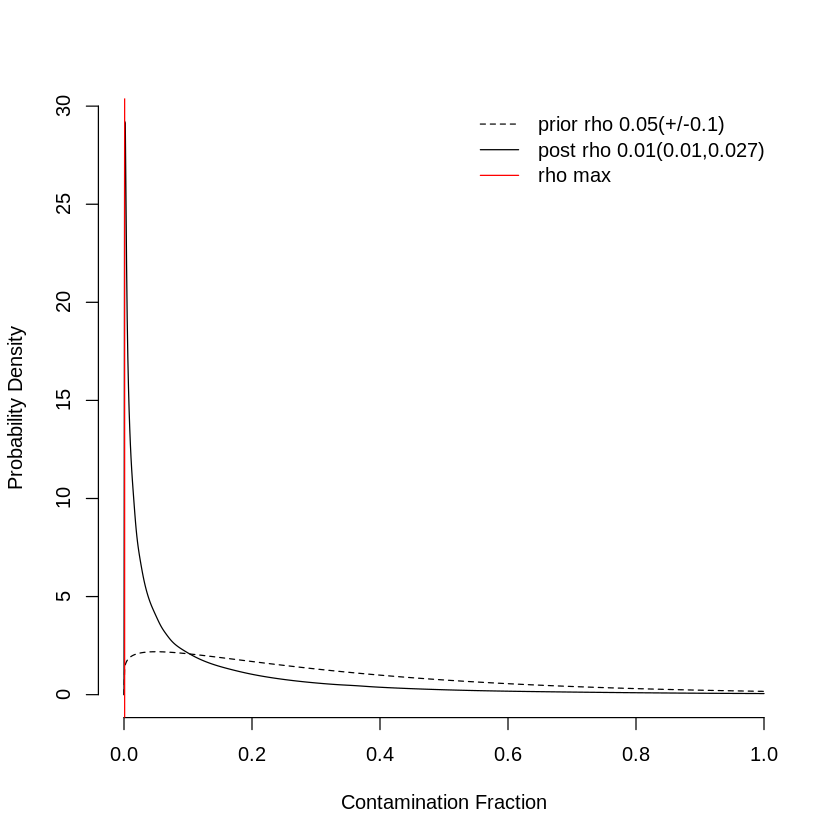

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Expanding counts from 12 clusters to 931 cells.

Centering and scaling data matrix

PC_ 1 
Positive:  Serpinh1, Igfbp4, Postn, Rarres2, Serping1, Col3a1, Bgn, Col1a2, Col6a2, Col6a1 
	   Pcolce, Clec3b, Tcf21, Efemp1, Wfdc1, Col1a1, Htra1, Cygb, Fbln1, Plpp3 
	   Spon2, Lum, Col5a1, Bmp4, C1s1, Oaf, Sfrp1, Itih5, Htra3, Id3 
Negative:  H2-DMb1, Cd83, Plbd1, Alox5ap, Pld4, Rnase6, Mpeg1, Cd68, Napsa, Hmgb2 
	   Lrrc25, Gm2a, Lmnb1, Hist1h1e, Hck, Gatm, Ms4a6c, Cks1b, Birc5, Cd300c2 
	   Glipr1, Wdfy4, Cd24a, Ptprcap, Bcl2a1d, Hist1h2ap, Eaf2, Unc119, Fcgr2b, Ppt1 
PC_ 2 
Positive:  Podxl, Emcn, Flt1, Kdr, Fabp4, Plvap, Tm4sf1, Ly6c1, Sox18, Ptprb 
	   Egfl7, Ace, Thrsp, Cdh5, Cyyr1, Esam, Tcf15, Adgrf5, Adgrl4, Pcp4l1 
	   Grrp1, Clu, Bcam, Pecam1, Cav1, Plscr2, Mrc1, Mmrn2, Gja4, Stmn2 
Negative:  Hmgb2, Tubb4b, Tubb5, Birc5, Tuba1b, Hmgn

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3545
Number of edges: 106173

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8877
Number of communities: 22
Elapsed time: 0 seconds


5487 genes passed tf-idf cut-off and 2699 soup quantile filter.  Taking the top 100.

Using 1616 independent estimates of rho.

Estimated global rho of 0.01



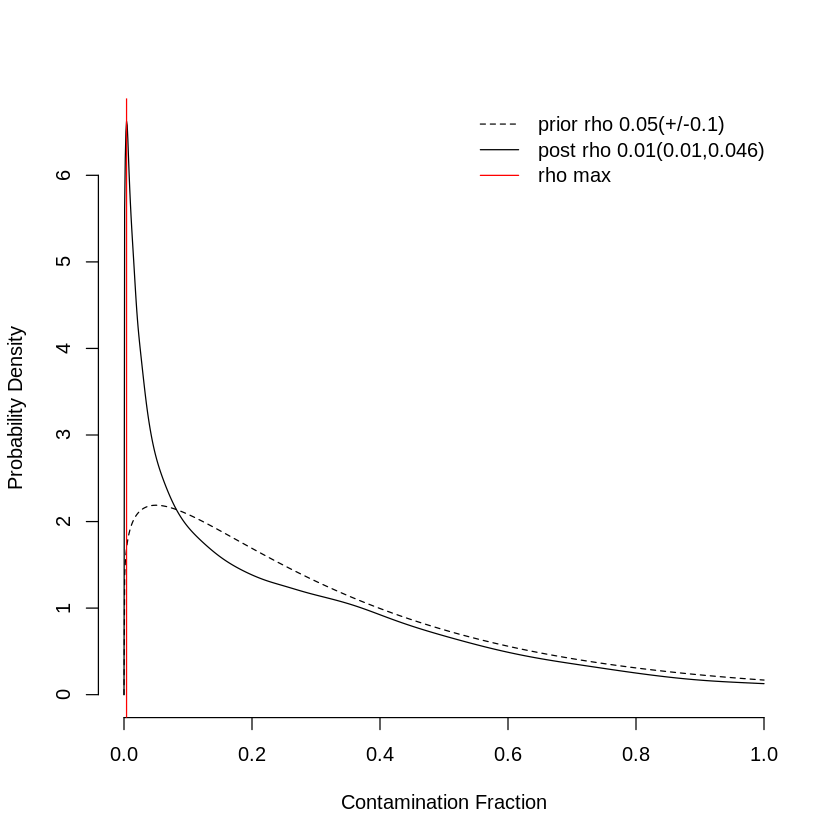

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Expanding counts from 22 clusters to 3545 cells.



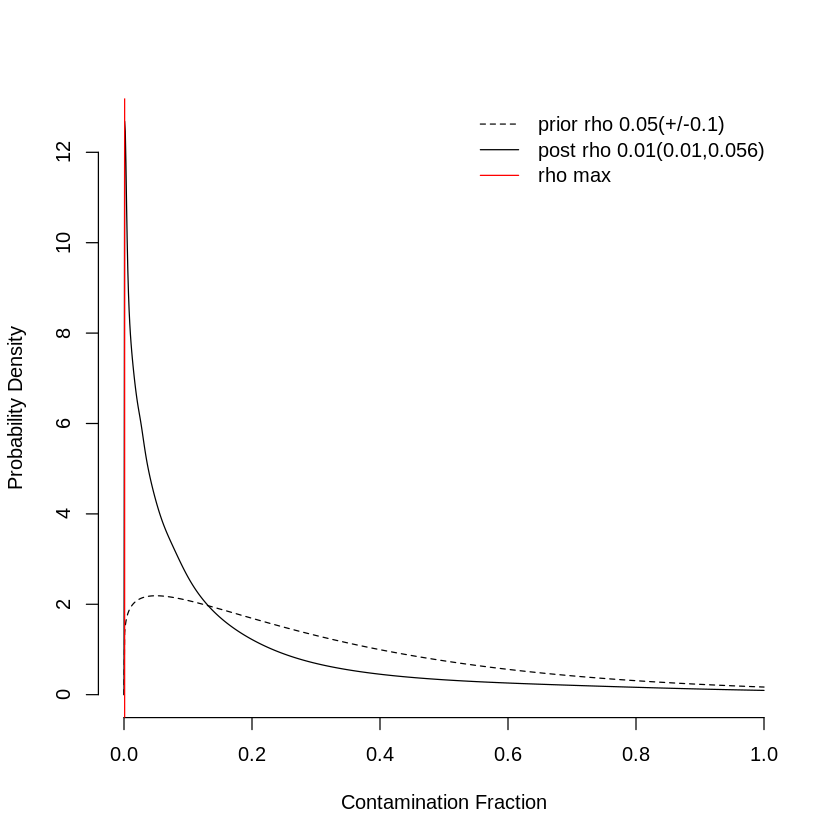

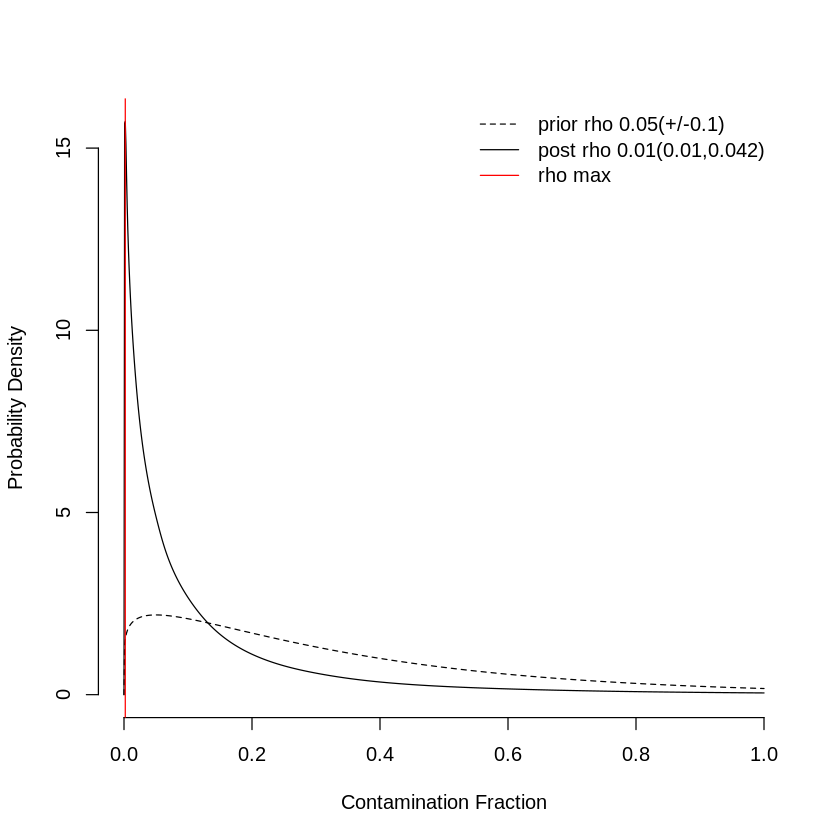

In [5]:
for(id in list) {
    # load files  
    tocpath <- paste("/nfs/team205/rb29/mice_gutTCRtg_project/data/tic-1097/",id,"/outs/per_sample_outs/",id,"/count/sample_feature_bc_matrix/", sep="")
    todpath <- paste("/nfs/team205/rb29/mice_gutTCRtg_project/data/tic-1097/",id,"/outs/multi/count/raw_feature_bc_matrix/", sep="")
    toc = Seurat::Read10X(tocpath)
    tod = Seurat::Read10X(todpath)
    sc = SoupChannel(tod, toc)
    
    # create metadata
    set.seed(1)
    srat = CreateSeuratObject(sc$toc)
    srat = ScaleData(srat)
    srat = FindVariableFeatures(srat)
    srat = RunPCA(srat,pcs.compute=30)
    srat = RunUMAP(srat, dims=seq(30))
    srat = FindNeighbors(srat, reductions.type="umap", dims = seq(30), resolution = 1)
    srat = FindClusters(srat,reductions.type="umap", dims = seq(30), resolution = 1)
    metadata = as.data.frame(srat[['umap']]@cell.embeddings)
    colnames(metadata) = c('RD1','RD2')
    metadata$Cluster = factor(srat@meta.data[rownames(metadata),'RNA_snn_res.1'])
    sc = setClusters(sc, setNames(metadata$Cluster, rownames(metadata)))
    sc = setDR(sc, metadata[colnames(sc$toc), c("RD1", "RD2")])
    
    # estimate contamination proportion
    sc = autoEstCont(sc, forceAccept = T, tfidfMin =  0.5)
    
    # remove contamination
    out = adjustCounts(sc)
    outpath = paste("/nfs/team205/rb29/mice_gutTCRtg_project/soupx/",id,"_soupx_out",sep="")
    DropletUtils:::write10xCounts(path=outpath, x=out)
}

---